# Сlassification model


## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn import metrics
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from prettytable import PrettyTable
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

## Data download

In [ ]:
mnist = fetch_openml(name='mnist_784')
X_train, X_test = mnist['data'][:60000], mnist['data'][60000:]
y_train, y_test = mnist['target'][:60000], mnist['target'][60000:]

In [ ]:
# Selection of optimal hyperparameters
param_grid = {
    'n_estimators': [50,100],
    'random_state': [0,5,10],
}
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=2, scoring='accuracy',
                    verbose=3)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)

print(grid.best_params_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ...n_estimators=50, random_state=0;, score=0.958 total time=  10.9s
[CV 2/2] END ...n_estimators=50, random_state=0;, score=0.959 total time=  10.6s
[CV 1/2] END ...n_estimators=50, random_state=5;, score=0.959 total time=  10.6s
[CV 2/2] END ...n_estimators=50, random_state=5;, score=0.959 total time=  10.7s
[CV 1/2] END ..n_estimators=50, random_state=10;, score=0.957 total time=  10.4s
[CV 2/2] END ..n_estimators=50, random_state=10;, score=0.960 total time=  10.3s
[CV 1/2] END ..n_estimators=100, random_state=0;, score=0.961 total time=  20.9s
[CV 2/2] END ..n_estimators=100, random_state=0;, score=0.962 total time=  21.0s
[CV 1/2] END ..n_estimators=100, random_state=5;, score=0.961 total time=  20.7s
[CV 2/2] END ..n_estimators=100, random_state=5;, score=0.962 total time=  20.7s
[CV 1/2] END .n_estimators=100, random_state=10;, score=0.961 total time=  20.9s
[CV 2/2] END .n_estimators=100, random_state=10;,

Accuracy score: 
0.9696


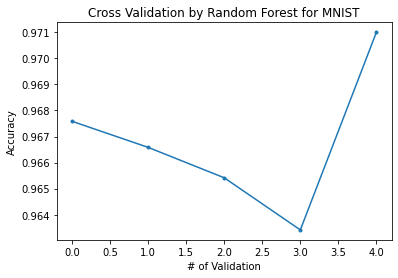

In [ ]:
rf_=RandomForestClassifier(n_estimators=100, random_state = 10)
rf_.fit(X_train, y_train)
score = cross_val_score(rf_, X_train, y_train,scoring='accuracy')
y_pred=rf_.predict(X_test)
print ("Accuracy score: ")
print(accuracy_score(y_pred, y_test))
plt.plot(score, '.-');
plt.title('Cross Validation by Random Forest for MNIST')
plt.xlabel('# of Validation');
plt.ylabel('Accuracy');


In [ ]:
print ("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<b>Note:</b>


The worst defined classes are '9', '8', . The best predicted class is '1'.

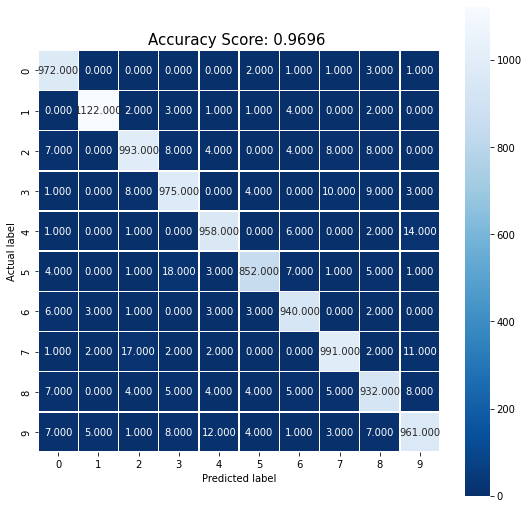

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0} '.format(accuracy_score(y_pred, y_test))
plt.title(all_sample_title, size = 15);

The table that reflects which class(es) the class is most often confused with in prediction.

In [ ]:
matrix  = confusion_matrix(y_test, y_pred)
for i in range(0, len(matrix)):
    for j in range(0, len(matrix[i])):
      if i == j:
        matrix[i][j] = 0
      #print(matrix[i][j], end=' ')
    #print()

number = []
max_vaue = []
for i in range(0, len(matrix)):
  max_value = []
  for j in range(0, len(matrix[i])):
   if matrix[i][j] == max(matrix[i]):
     max_value.append(j)
  number.append(max_value)

In [ ]:
table_result = PrettyTable()
table_result.add_column("0", [number[0]])
table_result.add_column("1", [number[1]])
table_result.add_column("2", [number[2]])
table_result.add_column("3", [number[3]])
table_result.add_column("4", [number[4]])
table_result.add_column("5", [number[5]])
table_result.add_column("6", [number[6]])
table_result.add_column("7", [number[7]])
table_result.add_column("8", [number[8]])
table_result.add_column("9", [number[9]])
print('Классы, с которыми происходит наибольшая путаница')
print()
table_result

Классы, с которыми происходит наибольшая путаница



0,1,2,3,4,5,6,7,8,9
[8],[6],"[3, 7, 8]",[7],[9],[3],[0],[2],[9],[4]


<b>Note:</b>

The confusion of classes is due to natural reasons, as the spelling of different numbers is similar in some cases, which causes difficulties for the model, because when considering the pixels, some of them will have a similar value, but the numbers will be different.

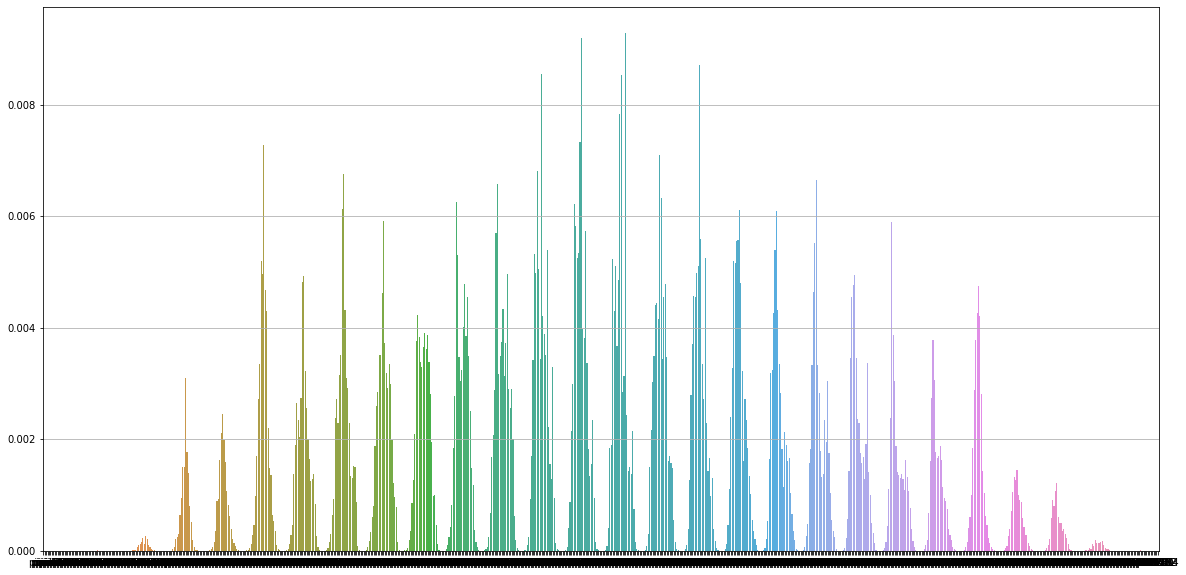

In [ ]:
#the importance of every pixel
x = X_test.columns
plt.figure(figsize=(20, 10))
plt.grid()
sns.barplot(x=x, y=rf_.feature_importances_);

The output of the most important ones, i.e. those whose significance is greater than 0.008.

In [ ]:
most_important = []
index = []
for numb in list(rf_.feature_importances_):
  if numb >= 0.008:
    most_important.append(numb)
    index.append(str(list(rf_.feature_importances_).index(numb)))
lis = dict(zip(index,most_important))
df = pd.DataFrame(lis,index=[0])
print(df)


        350       378       406       409       461
0  0.008552  0.009202  0.008531  0.009291  0.008715


## Methods based on the Boosting algorithm

### AdaBoost

In [ ]:
param_grid = {
    'n_estimators': [265],
    'learning_rate': [0.4],
    'random_state': [2],
    'algorithm': ['SAMME']
}
grid = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid, cv=2, scoring='accuracy',
                    verbose=3)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)

print(grid.best_params_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END algorithm=SAMME, learning_rate=0.4, n_estimators=265, random_state=2;, score=0.770 total time= 2.5min
[CV 2/2] END algorithm=SAMME, learning_rate=0.4, n_estimators=265, random_state=2;, score=0.789 total time= 2.5min
[CV 1/2] END algorithm=SAMME, learning_rate=0.4, n_estimators=265, random_state=5;, score=0.770 total time= 2.5min
[CV 2/2] END algorithm=SAMME, learning_rate=0.4, n_estimators=265, random_state=5;, score=0.789 total time= 2.5min
[CV 1/2] END algorithm=SAMME, learning_rate=0.4, n_estimators=265, random_state=20;, score=0.770 total time= 2.5min
[CV 2/2] END algorithm=SAMME, learning_rate=0.4, n_estimators=265, random_state=20;, score=0.789 total time= 2.5min
[CV 1/2] END algorithm=SAMME, learning_rate=0.4, n_estimators=265, random_state=584;, score=0.770 total time= 2.5min
[CV 2/2] END algorithm=SAMME, learning_rate=0.4, n_estimators=265, random_state=584;, score=0.789 total time= 2.5min
[CV 1/2] END a

Accuracy score: 
0.7768


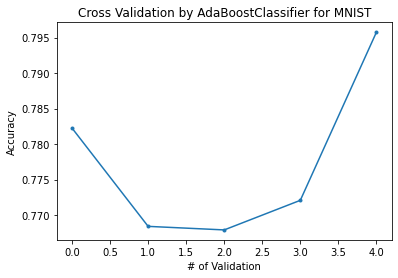

In [ ]:
ada_ = AdaBoostClassifier(n_estimators=265, random_state=2, learning_rate=0.4, algorithm='SAMME')
ada_.fit(X_train, y_train)
score = cross_val_score(ada_, X_train, y_train,scoring='accuracy')
y_pred=ada_.predict(X_test)
print ("Accuracy score: ")
print(accuracy_score(y_pred, y_test))
plt.plot(score, '.-');
plt.title('Cross Validation by AdaBoostClassifier for MNIST')
plt.xlabel('# of Validation');
plt.ylabel('Accuracy');

In [ ]:
print ("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       980
           1       0.91      0.92      0.92      1135
           2       0.78      0.72      0.75      1032
           3       0.75      0.74      0.74      1010
           4       0.80      0.78      0.79       982
           5       0.61      0.63      0.62       892
           6       0.84      0.79      0.82       958
           7       0.89      0.76      0.82      1028
           8       0.64      0.81      0.71       974
           9       0.70      0.80      0.75      1009

    accuracy                           0.78     10000
   macro avg       0.78      0.77      0.78     10000
weighted avg       0.78      0.78      0.78     10000



<b>Note:</b>

The worst defined classes are '5', '8', '9', . The best predicted class is '1'.

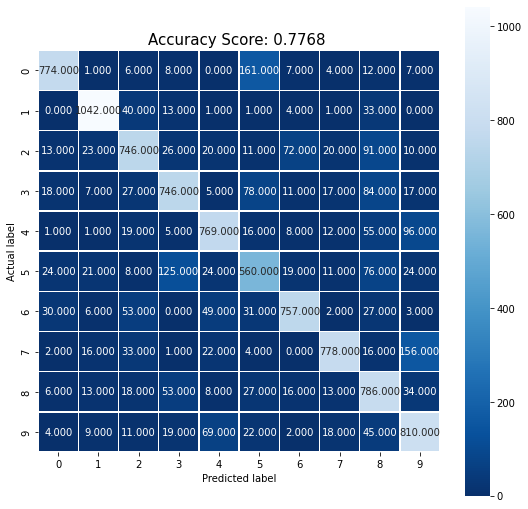

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0} '.format(accuracy_score(y_pred, y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
matrix  = confusion_matrix(y_test, y_pred)
for i in range(0, len(matrix)):
    for j in range(0, len(matrix[i])):
      if i == j:
        matrix[i][j] = 0
      #print(matrix[i][j], end=' ')
    #print()

number = []
max_vaue = []
for i in range(0, len(matrix)):
  max_value = []
  for j in range(0, len(matrix[i])):
   if matrix[i][j] == max(matrix[i]):
     max_value.append(j)
  number.append(max_value)

In [ ]:
table_result = PrettyTable()
table_result.add_column("0", [number[0]])
table_result.add_column("1", [number[1]])
table_result.add_column("2", [number[2]])
table_result.add_column("3", [number[3]])
table_result.add_column("4", [number[4]])
table_result.add_column("5", [number[5]])
table_result.add_column("6", [number[6]])
table_result.add_column("7", [number[7]])
table_result.add_column("8", [number[8]])
table_result.add_column("9", [number[9]])
print('Классы, с которыми происходит наибольшая путаница')
print()
table_result

Классы, с которыми происходит наибольшая путаница



0,1,2,3,4,5,6,7,8,9
[5],[2],[8],[8],[9],[3],[2],[9],[3],[4]


<b>Note:</b>

Thus 0 is confused with 5 most often, 1 with 2, 2 with 8, 3 with 8, 4 with 9 and so on, most often it happens the same way as in the Random Forest model, as the numbers have many similarities.

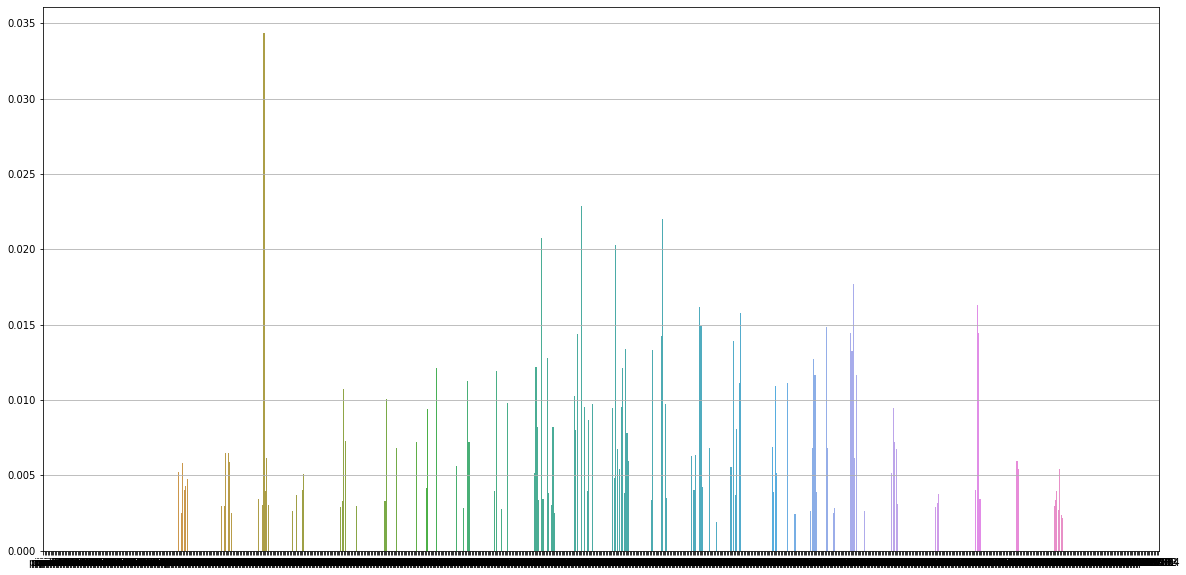

In [ ]:
#the importance of every pixel
x = X_test.columns
plt.figure(figsize=(20, 10))
plt.grid()
sns.barplot(x=x, y=ada_.feature_importances_);

The output of the most important ones, i.e. those whose significance is greater than 0.02

In [ ]:
most_important = []
index = []
for numb in list(ada_.feature_importances_):
  if numb >= 0.02:
    most_important.append(numb)
    index.append(str(list(ada_.feature_importances_).index(numb)))
lis = dict(zip(index,most_important))
df = pd.DataFrame(lis,index=[0])
print(df)

        155       350       378       402       435
0  0.034356  0.020734  0.022854  0.020288  0.021993


<b>Note:</b>

The most important pixels are pixels 155, 350 (matched), 378 (matched), 402 (close to 406), 435. Thus we have a similar pixel selection to the Random Forest model, which is not surprising, since the key elements in the selection of figures should be similar.

### LGBMClassifier

In [ ]:
param_grid = {
    'n_estimators': [245],
    'learning_rate': [0.5],
    'random_state': [2],
    'boosting_type': ['gbdt'],
    'num_leaves': [90],
    'max_deptn': [7],
    'subsample_for_bin': [50000],
    'objective' : ['multiclas'],
    'importance_type' : ['split'],
    'reg_alpha': [0.0],
    'reg_lambda': [0.6]
}
grid = GridSearchCV(LGBMClassifier(), param_grid=param_grid, cv=2, scoring='accuracy',
                    verbose=3)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)

print(grid.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END boosting_type=gbdt, importance_type=split, learning_rate=0.5, max_deptn=7, n_estimators=245, num_leaves=90, objective=multiclas, random_state=2, reg_alpha=0.0, reg_lambda=0.6, subsample_for_bin=50000;, score=0.971 total time= 3.8min
[CV 2/2] END boosting_type=gbdt, importance_type=split, learning_rate=0.5, max_deptn=7, n_estimators=245, num_leaves=90, objective=multiclas, random_state=2, reg_alpha=0.0, reg_lambda=0.6, subsample_for_bin=50000;, score=0.970 total time= 3.9min
{'boosting_type': 'gbdt', 'importance_type': 'split', 'learning_rate': 0.5, 'max_deptn': 7, 'n_estimators': 245, 'num_leaves': 90, 'objective': 'multiclas', 'random_state': 2, 'reg_alpha': 0.0, 'reg_lambda': 0.6, 'subsample_for_bin': 50000}


Accuracy score: 
0.9795


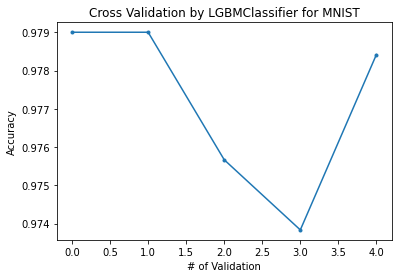

In [ ]:
lg_=LGBMClassifier(boosting_type='gbdt', num_leaves=90, max_depth=7, learning_rate=0.5,
                   n_estimators=245, subsample_for_bin=50000, objective='multiclas',
                    reg_alpha=0.0, reg_lambda=0.6,
                   random_state=2, importance_type='split')
lg_.fit(X_train, y_train)
score = cross_val_score(lg_, X_train, y_train,scoring='accuracy')
y_pred=lg_.predict(X_test)
print ("Accuracy score: ")
print(accuracy_score(y_pred, y_test))
plt.plot(score, '.-');
plt.title('Cross Validation by LGBMClassifier for MNIST')
plt.xlabel('# of Validation');
plt.ylabel('Accuracy');

In [ ]:
print ("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<b>Note:</b>

The worst predicted class is '9', but the difference is so small as to be practically imperceptible. All classes are predicted about equally well.

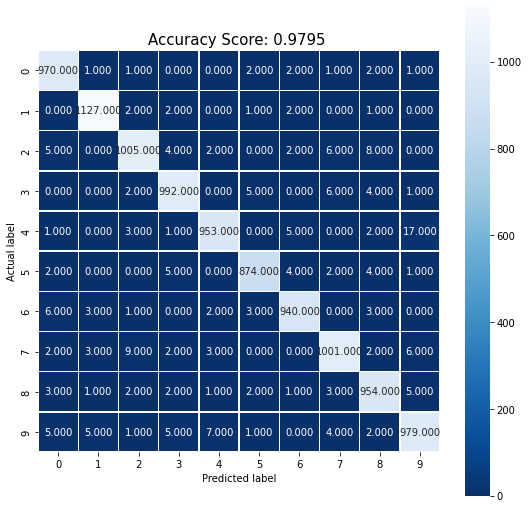

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0} '.format(accuracy_score(y_pred, y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
matrix  = confusion_matrix(y_test, y_pred)
for i in range(0, len(matrix)):
    for j in range(0, len(matrix[i])):
      if i == j:
        matrix[i][j] = 0
      #print(matrix[i][j], end=' ')
    #print()

number = []
max_vaue = []
for i in range(0, len(matrix)):
  max_value = []
  for j in range(0, len(matrix[i])):
   if matrix[i][j] == max(matrix[i]):
     max_value.append(j)
  number.append(max_value)

In [ ]:
table_result = PrettyTable()
table_result.add_column("0", [number[0]])
table_result.add_column("1", [number[1]])
table_result.add_column("2", [number[2]])
table_result.add_column("3", [number[3]])
table_result.add_column("4", [number[4]])
table_result.add_column("5", [number[5]])
table_result.add_column("6", [number[6]])
table_result.add_column("7", [number[7]])
table_result.add_column("8", [number[8]])
table_result.add_column("9", [number[9]])
print('Классы, с которыми происходит наибольшая путаница')
print()
table_result

Классы, с которыми происходит наибольшая путаница



0,1,2,3,4,5,6,7,8,9
"[5, 6, 8]","[2, 3, 6]",[8],[7],[9],[3],[0],[2],[9],[4]


<b>Note:</b>

For this model, the number of errors is small, but some numbers are very often confused with several values at the same time. For example 0 can be defined as 5, 6, 8, i.e. numbers with roundings.

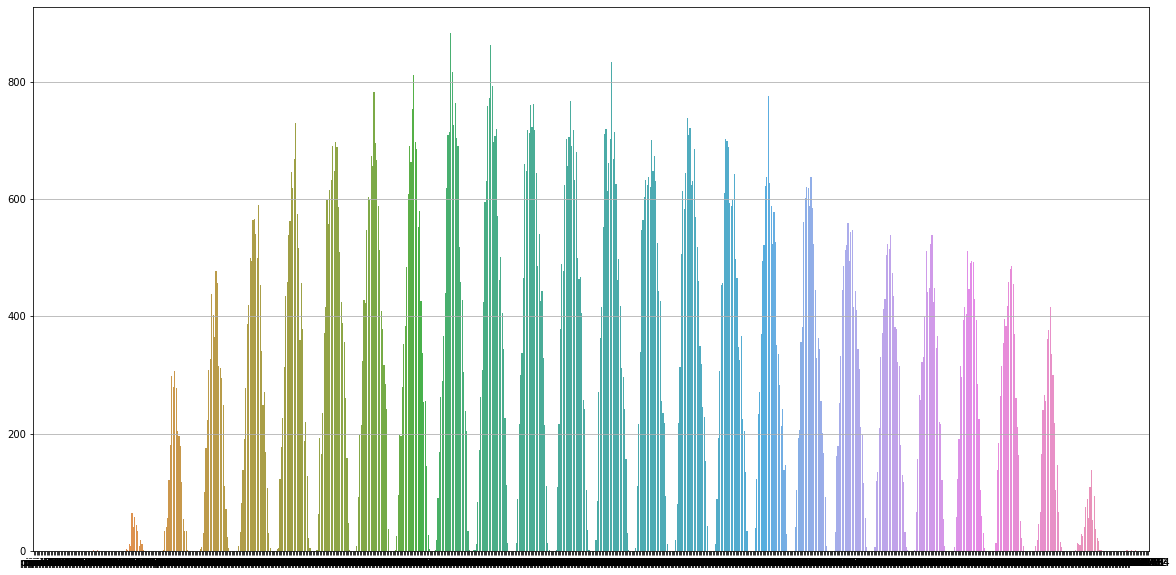

In [ ]:
#the importance of every pixel
x = X_test.columns
plt.figure(figsize=(20, 10))
plt.grid()
sns.barplot(x=x, y=lg_.feature_importances_);

The output of the most important ones, i.e. those whose significance is greater than 800.

In [ ]:
most_important = []
index = []
for numb in list(lg_.feature_importances_):
  if numb >= 800:
    most_important.append(numb)
    index.append(str(list(lg_.feature_importances_).index(numb)))
lis = dict(zip(index,most_important))
df = pd.DataFrame(lis,index=[0])
print(df)

   267  293  294  321  406
0  812  883  817  862  833


<b>Note:</b>

The most important pixels, are pixels 267, 297, 294, 321, 406 (matched Random Forest)

## Conclusion

* What are the differences in the answers to the above questions between random forest and bousting classifiers? Which model shows the most optimal behaviour?

* Evaluate the training time of the classifiers - which classifier trained faster, how much time is spent to build one element of the ensemble.

In terms of accuracy, Random Forest and LGBMClassifier performed well (0.97 and 0.98 respectively), AdaBoost cannot compete with them (0.78) accurucy. There is a general trend that classes 8,9 are the worst predicted, as they are very similar, the best predictions for all models were for 1, and globally the patterns coincided, and also the confusion of classes +- is the same for all models. AdaBoost and Random Forest have overlap in pixel importance, and LGBM has a more unique set of values for this metric. However, the speed of model training will be a key factor in choosing between the two most accurate models, as it takes only 25 seconds to train the Random Forest model with optimal parameters, compared to 4.5 minutes for LGBM with a small difference in accuracy. Thus, the optimal model is Random Forest.

----

RandomForestClassifier is a very fast and highly accurate algorithm. The construction of one ensemble depends on the number of estimators. At 50, it takes about 10.5 seconds  
an average of about 10.5 seconds, at 100 it doubles.
 and so on there is a linear growth of training time depending on the estimators. Training the model with crossvalidation took about 4-5 minutes. The accuracy is ~ 0.97.

AdaBoostClassifier is a rather slow algorithm. The construction of one ensemble depends on the number of estimators. At 50, it takes about 25 seconds  
on average about 25 seconds, at 100 it doubles and so on increases linearly. Training the model with optimal parameters took about 2.5 minutes, and together with crossvalidation about 17. At the same time the model has a low accuracy of only ~0.77.

LGBMClassifier is the slowest algorithm. The construction of one ensemble depends on the number of estimators, the number of sheets, the maximum depth and lambda with alpha (increasing these parameters speeds up the learning, but can unnecessarily reduce the accuracy). At optimal parameters and 50 estimates, the construction took on average about 50 seconds, at 100 it increases twice and so on linearly increased. Training of the model with the selected parameters took about 4.5 minutes, and by crossvalidation about 35 minutes.